In [356]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date

pd.set_option('display.max_rows', 3)

In [328]:
#Location of files
filepath = '/Users/vano/Dropbox/raid/rmjoc2/nrni/%s.csv'
location = 'NRNI_Flows_1929-2008_Corrected_08-2016'
filepath%location 

filepath2 = '/Users/vano/Dropbox/raid/rmjoc2/bcsd/%s.csv'
location2 = 'CCSM4_rcp85_BCSD_VIC_P1-LIB-biascorrected_streamflow-provisional_0.3'
filepath2%location2 

#Joe (eventually): what is the best way to do a remote path - for example, the files I'd like to use are at 
#hydra:/raid3/oriana/bpa/future/VIC/calib_inverse/bcsd/{GCM}/{RCP}/deliverables/

'/Users/vano/Dropbox/raid/rmjoc2/bcsd/CCSM4_rcp85_BCSD_VIC_P1-LIB-biascorrected_streamflow-provisional_0.3.csv'

In [350]:
df = pd.read_csv(filepath%(location), skiprows=range(1, 7), usecols=range(1,199))
nrni=df['LIB5N']

df2 = pd.read_csv(filepath2%(location2),header=35) 
#Joe: is there a way this could be done automatically without setting the header??  Skip_blank_lines=True didn't seem to help.
fut=df2['biascorrected_streamflow']
df2

,date,biascorrected_streamflow
0,1950-01-01,1759.640
...,...,...
54786,2099-12-31,5177.448


In [346]:
tsv2 = pd.DataFrame(fut,index=df2['date'])  #Joe:how do I get the date to be the index? 
#or would it be better to read in separate year, day, month for groupby?
tsv2

,biascorrected_streamflow
date,
1950-01-01,NaN
...,...
2099-12-31,NaN


In [347]:
rng = pd.date_range('07/1/1928', periods=29312, freq='D')
tsv1 = pd.DataFrame(nrni,index=rng, dtype='int32') #Joe: unsure why ts1 gives NaNs
ts = pd.DataFrame(nrni.values,index=rng, dtype='int32')  #Joe: another way?  this works but lose the header
ts

,0
1928-07-01,37013
...,...
2008-09-30,5088


In [354]:
ts.describe()

,0
count,29312.000000
mean,11257.074748
std,13035.473068
min,195.000000
25%,3495.750000
50%,5622.500000
75%,13056.500000
max,110816.000000


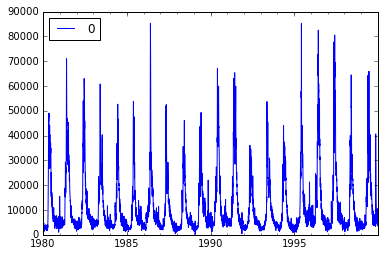

In [201]:
ts['1980':'1999'].plot()  #Joe: what is the difference between plot() at end or at the beginning?

In [204]:
# helper function for finding day of water year 
# Joe: what is the best to set up as a utility?
def water_day(indate):
    doy = indate.timetuple().tm_yday
    if doy >= 274:
        outdate = doy - 274
    else:
        outdate = doy + 91
    return outdate

(0, 366)

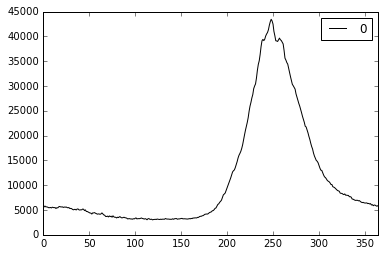

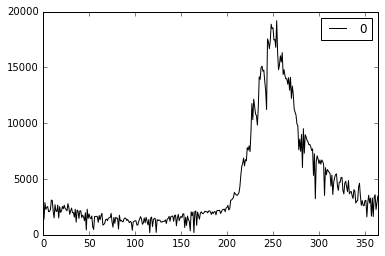

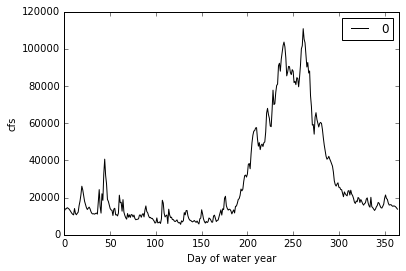

In [208]:
ax = ts.groupby(lambda x:water_day(x)).mean().plot(style='k-')
ax = ts.groupby(lambda x:water_day(x)).min().plot(style='k-')
ax = ts.groupby(lambda x:water_day(x)).max().plot(style='k-')
ax.set_ylabel('cfs')
ax.set_xlabel('Day of water year')
plt.xlim((0,366))

#using this approach, how get on the same plot?

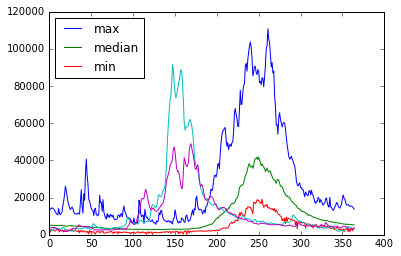

In [390]:
plt.figure()
t = np.arange(365)

median1 = ts.groupby(lambda x:water_day(x)).median()
min1 = ts.groupby(lambda x:water_day(x)).min()
max1 = ts.groupby(lambda x:water_day(x)).max()

plt.plot(t, max1)
plt.plot(t, median1)
plt.plot(t, min1)

for i in range(1961,1963):    
    plt.plot(t, ts['%s' % (i)]) 
    
plt.legend(['max','median', 'min'], loc='upper left')
#XXX using this approach, need to revise syntax for labels
#set_ylabel('cfs')
#set_xlabel('Day of water year')
plt.show()

In [395]:
#XXX need to make into water year, work during leap year, then include in loop above
i = 1945
rng2 = pd.date_range('10/1/%i' % (i), periods=365, freq='D')
rng2
plt.plot(t, ts[rng2])  
#ts['1980-10-1':'1982-10-01']

#XXX how do you extract values based on a date range; could just loop by year using range, but
#then t a problem with leap years

KeyError: "['1945-10-01T00:00:00.000000000Z' '1945-10-02T00:00:00.000000000Z'\n '1945-10-03T00:00:00.000000000Z' '1945-10-04T00:00:00.000000000Z'\n '1945-10-05T00:00:00.000000000Z' '1945-10-06T00:00:00.000000000Z'\n '1945-10-07T00:00:00.000000000Z' '1945-10-08T00:00:00.000000000Z'\n '1945-10-09T00:00:00.000000000Z' '1945-10-10T00:00:00.000000000Z'\n '1945-10-11T00:00:00.000000000Z' '1945-10-12T00:00:00.000000000Z'\n '1945-10-13T00:00:00.000000000Z' '1945-10-14T00:00:00.000000000Z'\n '1945-10-15T00:00:00.000000000Z' '1945-10-16T00:00:00.000000000Z'\n '1945-10-17T00:00:00.000000000Z' '1945-10-18T00:00:00.000000000Z'\n '1945-10-19T00:00:00.000000000Z' '1945-10-20T00:00:00.000000000Z'\n '1945-10-21T00:00:00.000000000Z' '1945-10-22T00:00:00.000000000Z'\n '1945-10-23T00:00:00.000000000Z' '1945-10-24T00:00:00.000000000Z'\n '1945-10-25T00:00:00.000000000Z' '1945-10-26T00:00:00.000000000Z'\n '1945-10-27T00:00:00.000000000Z' '1945-10-28T00:00:00.000000000Z'\n '1945-10-29T00:00:00.000000000Z' '1945-10-30T00:00:00.000000000Z'\n '1945-10-31T00:00:00.000000000Z' '1945-11-01T00:00:00.000000000Z'\n '1945-11-02T00:00:00.000000000Z' '1945-11-03T00:00:00.000000000Z'\n '1945-11-04T00:00:00.000000000Z' '1945-11-05T00:00:00.000000000Z'\n '1945-11-06T00:00:00.000000000Z' '1945-11-07T00:00:00.000000000Z'\n '1945-11-08T00:00:00.000000000Z' '1945-11-09T00:00:00.000000000Z'\n '1945-11-10T00:00:00.000000000Z' '1945-11-11T00:00:00.000000000Z'\n '1945-11-12T00:00:00.000000000Z' '1945-11-13T00:00:00.000000000Z'\n '1945-11-14T00:00:00.000000000Z' '1945-11-15T00:00:00.000000000Z'\n '1945-11-16T00:00:00.000000000Z' '1945-11-17T00:00:00.000000000Z'\n '1945-11-18T00:00:00.000000000Z' '1945-11-19T00:00:00.000000000Z'\n '1945-11-20T00:00:00.000000000Z' '1945-11-21T00:00:00.000000000Z'\n '1945-11-22T00:00:00.000000000Z' '1945-11-23T00:00:00.000000000Z'\n '1945-11-24T00:00:00.000000000Z' '1945-11-25T00:00:00.000000000Z'\n '1945-11-26T00:00:00.000000000Z' '1945-11-27T00:00:00.000000000Z'\n '1945-11-28T00:00:00.000000000Z' '1945-11-29T00:00:00.000000000Z'\n '1945-11-30T00:00:00.000000000Z' '1945-12-01T00:00:00.000000000Z'\n '1945-12-02T00:00:00.000000000Z' '1945-12-03T00:00:00.000000000Z'\n '1945-12-04T00:00:00.000000000Z' '1945-12-05T00:00:00.000000000Z'\n '1945-12-06T00:00:00.000000000Z' '1945-12-07T00:00:00.000000000Z'\n '1945-12-08T00:00:00.000000000Z' '1945-12-09T00:00:00.000000000Z'\n '1945-12-10T00:00:00.000000000Z' '1945-12-11T00:00:00.000000000Z'\n '1945-12-12T00:00:00.000000000Z' '1945-12-13T00:00:00.000000000Z'\n '1945-12-14T00:00:00.000000000Z' '1945-12-15T00:00:00.000000000Z'\n '1945-12-16T00:00:00.000000000Z' '1945-12-17T00:00:00.000000000Z'\n '1945-12-18T00:00:00.000000000Z' '1945-12-19T00:00:00.000000000Z'\n '1945-12-20T00:00:00.000000000Z' '1945-12-21T00:00:00.000000000Z'\n '1945-12-22T00:00:00.000000000Z' '1945-12-23T00:00:00.000000000Z'\n '1945-12-24T00:00:00.000000000Z' '1945-12-25T00:00:00.000000000Z'\n '1945-12-26T00:00:00.000000000Z' '1945-12-27T00:00:00.000000000Z'\n '1945-12-28T00:00:00.000000000Z' '1945-12-29T00:00:00.000000000Z'\n '1945-12-30T00:00:00.000000000Z' '1945-12-31T00:00:00.000000000Z'\n '1946-01-01T00:00:00.000000000Z' '1946-01-02T00:00:00.000000000Z'\n '1946-01-03T00:00:00.000000000Z' '1946-01-04T00:00:00.000000000Z'\n '1946-01-05T00:00:00.000000000Z' '1946-01-06T00:00:00.000000000Z'\n '1946-01-07T00:00:00.000000000Z' '1946-01-08T00:00:00.000000000Z'\n '1946-01-09T00:00:00.000000000Z' '1946-01-10T00:00:00.000000000Z'\n '1946-01-11T00:00:00.000000000Z' '1946-01-12T00:00:00.000000000Z'\n '1946-01-13T00:00:00.000000000Z' '1946-01-14T00:00:00.000000000Z'\n '1946-01-15T00:00:00.000000000Z' '1946-01-16T00:00:00.000000000Z'\n '1946-01-17T00:00:00.000000000Z' '1946-01-18T00:00:00.000000000Z'\n '1946-01-19T00:00:00.000000000Z' '1946-01-20T00:00:00.000000000Z'\n '1946-01-21T00:00:00.000000000Z' '1946-01-22T00:00:00.000000000Z'\n '1946-01-23T00:00:00.000000000Z' '1946-01-24T00:00:00.000000000Z'\n '1946-01-25T00:00:00.000000000Z' '1946-01-26T00:00:00.000000000Z'\n '1946-01-27T00:00:00.000000000Z' '1946-01-28T00:00:00.000000000Z'\n '1946-01-29T00:00:00.000000000Z' '1946-01-30T00:00:00.000000000Z'\n '1946-01-31T00:00:00.000000000Z' '1946-02-01T00:00:00.000000000Z'\n '1946-02-02T00:00:00.000000000Z' '1946-02-03T00:00:00.000000000Z'\n '1946-02-04T00:00:00.000000000Z' '1946-02-05T00:00:00.000000000Z'\n '1946-02-06T00:00:00.000000000Z' '1946-02-07T00:00:00.000000000Z'\n '1946-02-08T00:00:00.000000000Z' '1946-02-09T00:00:00.000000000Z'\n '1946-02-10T00:00:00.000000000Z' '1946-02-11T00:00:00.000000000Z'\n '1946-02-12T00:00:00.000000000Z' '1946-02-13T00:00:00.000000000Z'\n '1946-02-14T00:00:00.000000000Z' '1946-02-15T00:00:00.000000000Z'\n '1946-02-16T00:00:00.000000000Z' '1946-02-17T00:00:00.000000000Z'\n '1946-02-18T00:00:00.000000000Z' '1946-02-19T00:00:00.000000000Z'\n '1946-02-20T00:00:00.000000000Z' '1946-02-21T00:00:00.000000000Z'\n '1946-02-22T00:00:00.000000000Z' '1946-02-23T00:00:00.000000000Z'\n '1946-02-24T00:00:00.000000000Z' '1946-02-25T00:00:00.000000000Z'\n '1946-02-26T00:00:00.000000000Z' '1946-02-27T00:00:00.000000000Z'\n '1946-02-28T00:00:00.000000000Z' '1946-03-01T00:00:00.000000000Z'\n '1946-03-02T00:00:00.000000000Z' '1946-03-03T00:00:00.000000000Z'\n '1946-03-04T00:00:00.000000000Z' '1946-03-05T00:00:00.000000000Z'\n '1946-03-06T00:00:00.000000000Z' '1946-03-07T00:00:00.000000000Z'\n '1946-03-08T00:00:00.000000000Z' '1946-03-09T00:00:00.000000000Z'\n '1946-03-10T00:00:00.000000000Z' '1946-03-11T00:00:00.000000000Z'\n '1946-03-12T00:00:00.000000000Z' '1946-03-13T00:00:00.000000000Z'\n '1946-03-14T00:00:00.000000000Z' '1946-03-15T00:00:00.000000000Z'\n '1946-03-16T00:00:00.000000000Z' '1946-03-17T00:00:00.000000000Z'\n '1946-03-18T00:00:00.000000000Z' '1946-03-19T00:00:00.000000000Z'\n '1946-03-20T00:00:00.000000000Z' '1946-03-21T00:00:00.000000000Z'\n '1946-03-22T00:00:00.000000000Z' '1946-03-23T00:00:00.000000000Z'\n '1946-03-24T00:00:00.000000000Z' '1946-03-25T00:00:00.000000000Z'\n '1946-03-26T00:00:00.000000000Z' '1946-03-27T00:00:00.000000000Z'\n '1946-03-28T00:00:00.000000000Z' '1946-03-29T00:00:00.000000000Z'\n '1946-03-30T00:00:00.000000000Z' '1946-03-31T00:00:00.000000000Z'\n '1946-04-01T00:00:00.000000000Z' '1946-04-02T00:00:00.000000000Z'\n '1946-04-03T00:00:00.000000000Z' '1946-04-04T00:00:00.000000000Z'\n '1946-04-05T00:00:00.000000000Z' '1946-04-06T00:00:00.000000000Z'\n '1946-04-07T00:00:00.000000000Z' '1946-04-08T00:00:00.000000000Z'\n '1946-04-09T00:00:00.000000000Z' '1946-04-10T00:00:00.000000000Z'\n '1946-04-11T00:00:00.000000000Z' '1946-04-12T00:00:00.000000000Z'\n '1946-04-13T00:00:00.000000000Z' '1946-04-14T00:00:00.000000000Z'\n '1946-04-15T00:00:00.000000000Z' '1946-04-16T00:00:00.000000000Z'\n '1946-04-17T00:00:00.000000000Z' '1946-04-18T00:00:00.000000000Z'\n '1946-04-19T00:00:00.000000000Z' '1946-04-20T00:00:00.000000000Z'\n '1946-04-21T00:00:00.000000000Z' '1946-04-22T00:00:00.000000000Z'\n '1946-04-23T00:00:00.000000000Z' '1946-04-24T00:00:00.000000000Z'\n '1946-04-25T00:00:00.000000000Z' '1946-04-26T00:00:00.000000000Z'\n '1946-04-27T00:00:00.000000000Z' '1946-04-28T00:00:00.000000000Z'\n '1946-04-29T00:00:00.000000000Z' '1946-04-30T00:00:00.000000000Z'\n '1946-05-01T00:00:00.000000000Z' '1946-05-02T00:00:00.000000000Z'\n '1946-05-03T00:00:00.000000000Z' '1946-05-04T00:00:00.000000000Z'\n '1946-05-05T00:00:00.000000000Z' '1946-05-06T00:00:00.000000000Z'\n '1946-05-07T00:00:00.000000000Z' '1946-05-08T00:00:00.000000000Z'\n '1946-05-09T00:00:00.000000000Z' '1946-05-10T00:00:00.000000000Z'\n '1946-05-11T00:00:00.000000000Z' '1946-05-12T00:00:00.000000000Z'\n '1946-05-13T00:00:00.000000000Z' '1946-05-14T00:00:00.000000000Z'\n '1946-05-15T00:00:00.000000000Z' '1946-05-16T00:00:00.000000000Z'\n '1946-05-17T00:00:00.000000000Z' '1946-05-18T00:00:00.000000000Z'\n '1946-05-19T00:00:00.000000000Z' '1946-05-20T00:00:00.000000000Z'\n '1946-05-21T00:00:00.000000000Z' '1946-05-22T00:00:00.000000000Z'\n '1946-05-23T00:00:00.000000000Z' '1946-05-24T00:00:00.000000000Z'\n '1946-05-25T00:00:00.000000000Z' '1946-05-26T00:00:00.000000000Z'\n '1946-05-27T00:00:00.000000000Z' '1946-05-28T00:00:00.000000000Z'\n '1946-05-29T00:00:00.000000000Z' '1946-05-30T00:00:00.000000000Z'\n '1946-05-31T00:00:00.000000000Z' '1946-06-01T00:00:00.000000000Z'\n '1946-06-02T00:00:00.000000000Z' '1946-06-03T00:00:00.000000000Z'\n '1946-06-04T00:00:00.000000000Z' '1946-06-05T00:00:00.000000000Z'\n '1946-06-06T00:00:00.000000000Z' '1946-06-07T00:00:00.000000000Z'\n '1946-06-08T00:00:00.000000000Z' '1946-06-09T00:00:00.000000000Z'\n '1946-06-10T00:00:00.000000000Z' '1946-06-11T00:00:00.000000000Z'\n '1946-06-12T00:00:00.000000000Z' '1946-06-13T00:00:00.000000000Z'\n '1946-06-14T00:00:00.000000000Z' '1946-06-15T00:00:00.000000000Z'\n '1946-06-16T00:00:00.000000000Z' '1946-06-17T00:00:00.000000000Z'\n '1946-06-18T00:00:00.000000000Z' '1946-06-19T00:00:00.000000000Z'\n '1946-06-20T00:00:00.000000000Z' '1946-06-21T00:00:00.000000000Z'\n '1946-06-22T00:00:00.000000000Z' '1946-06-23T00:00:00.000000000Z'\n '1946-06-24T00:00:00.000000000Z' '1946-06-25T00:00:00.000000000Z'\n '1946-06-26T00:00:00.000000000Z' '1946-06-27T00:00:00.000000000Z'\n '1946-06-28T00:00:00.000000000Z' '1946-06-29T00:00:00.000000000Z'\n '1946-06-30T00:00:00.000000000Z' '1946-07-01T00:00:00.000000000Z'\n '1946-07-02T00:00:00.000000000Z' '1946-07-03T00:00:00.000000000Z'\n '1946-07-04T00:00:00.000000000Z' '1946-07-05T00:00:00.000000000Z'\n '1946-07-06T00:00:00.000000000Z' '1946-07-07T00:00:00.000000000Z'\n '1946-07-08T00:00:00.000000000Z' '1946-07-09T00:00:00.000000000Z'\n '1946-07-10T00:00:00.000000000Z' '1946-07-11T00:00:00.000000000Z'\n '1946-07-12T00:00:00.000000000Z' '1946-07-13T00:00:00.000000000Z'\n '1946-07-14T00:00:00.000000000Z' '1946-07-15T00:00:00.000000000Z'\n '1946-07-16T00:00:00.000000000Z' '1946-07-17T00:00:00.000000000Z'\n '1946-07-18T00:00:00.000000000Z' '1946-07-19T00:00:00.000000000Z'\n '1946-07-20T00:00:00.000000000Z' '1946-07-21T00:00:00.000000000Z'\n '1946-07-22T00:00:00.000000000Z' '1946-07-23T00:00:00.000000000Z'\n '1946-07-24T00:00:00.000000000Z' '1946-07-25T00:00:00.000000000Z'\n '1946-07-26T00:00:00.000000000Z' '1946-07-27T00:00:00.000000000Z'\n '1946-07-28T00:00:00.000000000Z' '1946-07-29T00:00:00.000000000Z'\n '1946-07-30T00:00:00.000000000Z' '1946-07-31T00:00:00.000000000Z'\n '1946-08-01T00:00:00.000000000Z' '1946-08-02T00:00:00.000000000Z'\n '1946-08-03T00:00:00.000000000Z' '1946-08-04T00:00:00.000000000Z'\n '1946-08-05T00:00:00.000000000Z' '1946-08-06T00:00:00.000000000Z'\n '1946-08-07T00:00:00.000000000Z' '1946-08-08T00:00:00.000000000Z'\n '1946-08-09T00:00:00.000000000Z' '1946-08-10T00:00:00.000000000Z'\n '1946-08-11T00:00:00.000000000Z' '1946-08-12T00:00:00.000000000Z'\n '1946-08-13T00:00:00.000000000Z' '1946-08-14T00:00:00.000000000Z'\n '1946-08-15T00:00:00.000000000Z' '1946-08-16T00:00:00.000000000Z'\n '1946-08-17T00:00:00.000000000Z' '1946-08-18T00:00:00.000000000Z'\n '1946-08-19T00:00:00.000000000Z' '1946-08-20T00:00:00.000000000Z'\n '1946-08-21T00:00:00.000000000Z' '1946-08-22T00:00:00.000000000Z'\n '1946-08-23T00:00:00.000000000Z' '1946-08-24T00:00:00.000000000Z'\n '1946-08-25T00:00:00.000000000Z' '1946-08-26T00:00:00.000000000Z'\n '1946-08-27T00:00:00.000000000Z' '1946-08-28T00:00:00.000000000Z'\n '1946-08-29T00:00:00.000000000Z' '1946-08-30T00:00:00.000000000Z'\n '1946-08-31T00:00:00.000000000Z' '1946-09-01T00:00:00.000000000Z'\n '1946-09-02T00:00:00.000000000Z' '1946-09-03T00:00:00.000000000Z'\n '1946-09-04T00:00:00.000000000Z' '1946-09-05T00:00:00.000000000Z'\n '1946-09-06T00:00:00.000000000Z' '1946-09-07T00:00:00.000000000Z'\n '1946-09-08T00:00:00.000000000Z' '1946-09-09T00:00:00.000000000Z'\n '1946-09-10T00:00:00.000000000Z' '1946-09-11T00:00:00.000000000Z'\n '1946-09-12T00:00:00.000000000Z' '1946-09-13T00:00:00.000000000Z'\n '1946-09-14T00:00:00.000000000Z' '1946-09-15T00:00:00.000000000Z'\n '1946-09-16T00:00:00.000000000Z' '1946-09-17T00:00:00.000000000Z'\n '1946-09-18T00:00:00.000000000Z' '1946-09-19T00:00:00.000000000Z'\n '1946-09-20T00:00:00.000000000Z' '1946-09-21T00:00:00.000000000Z'\n '1946-09-22T00:00:00.000000000Z' '1946-09-23T00:00:00.000000000Z'\n '1946-09-24T00:00:00.000000000Z' '1946-09-25T00:00:00.000000000Z'\n '1946-09-26T00:00:00.000000000Z' '1946-09-27T00:00:00.000000000Z'\n '1946-09-28T00:00:00.000000000Z' '1946-09-29T00:00:00.000000000Z'\n '1946-09-30T00:00:00.000000000Z'] not in index"

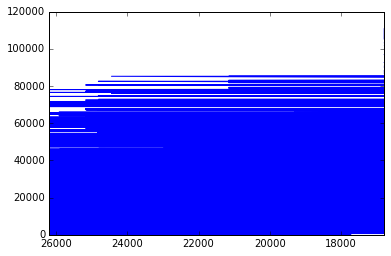

In [382]:
#flow duration curve, very much work in progress
x = df.sort_values(by="LIB5N")
dailysort=x['LIB5N']
dailysort[1:]
#plt.plot(dailysort[1:])  #XXX how only plot second column 
dailysort[1:].plot.line()

0    9260900
dtype: int64

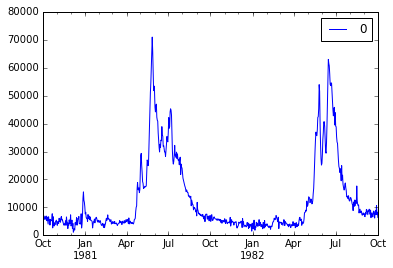

In [311]:
#calculate the histograms
#plot(kind='bar')
#.sum()
ts['1980-10-1':'1982-10-01'].plot()
ts['1980-10-1':'1982-10-01'].sum()
#XXX look up how to turn daily flows into monthly, there's got to be some matrix way of doing this

